<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-with-Python/blob/master/9_Reduccion_Dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Reducción de la Dimensionalidad
## [M.Sc. Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

En los clases anteriores de la serie de *Machine Learning* hemos visto multitud de algoritmos: modelos de regresión lineal, *Support Vector Machines*, árboles de decisión y modelos ensamblados, como los *Random Forest*. Todos los ejemplos que hemos visto hasta ahora consistían de *datasets* con pocas características, o *features* (ya que así podemos probar de manera rápida muchos modelos y compararlos). En muchos problemas reales, sin embargo, solemos tener muchas características (es común tener cientos o incluso miles o millones). Esto resulta en entrenamientos muy lentos (si es que son posibles) para encontrar una buena solución. Para aliviar este problema existen varias técnicas de *Reducción de la Dimensionalidad*, que como su propio nombre indica son algoritmos para reducir el número de características de nuestros datos a una cantidad manejable por los modelos de ML sin perder por el camino mucha información con el objetivo de obtener resultados similares a los que obtendríamos usando todas las *features*. Estas técnicas también son muy utilizadas para generar visualizaciones de los datos, útiles para descubrir patrones sencillos y comunicar conclusiones. En este post veremos algunas de estas técnicas y aplicaciones a ejemplos sencillos. ¡Vamos a ello!

## Tipos de Técnicas de Reducción de la Dimensionalidad

Básicamente, existen dos técnicas para reducir la dimensionalidad de un dataset: la *Proyección* y el *Manifold Learning*. En muchos problemas reales las muestras de entrenamiento no se encuentran esparcidas de manera uniforme en todas sus dimensiones. Muchas de las características son constantes mientras que otras están altamente correlacionadas. Esto implica que las muestras de entrenamiento de un dataset suelen encontrarse en subespacios de baja dimensionalidad dentro del espacio de alta dimensionalidad original. La siguiente imagen ilustra este caso en un dataset tridimensional que, al ser proyectado en un subespacio bidimensional, sigue manteniendo la mayoría de la información.

![](https://mymlpics.s3.eu-de.cloud-object-storage.appdomain.cloud/dim_red_3d.png) ![](https://mymlpics.s3.eu-de.cloud-object-storage.appdomain.cloud/dim_red_2d.png)

Sin embargo, hay ocasiones en las que la proyección no es la mejor alternativa ya que los datos pueden estar pleagdos en el espacio de alta dimensionalidad. En estos casos, técnicas de *manifold learning* permiten "desdoblar" estos datos para representarlos con menor dimension manteniendo la máxima información posible (como puedes ver en la siguiente figura).

![](https://mymlpics.s3.eu-de.cloud-object-storage.appdomain.cloud/swiss_roll.png) ![](https://mymlpics.s3.eu-de.cloud-object-storage.appdomain.cloud/swiss_roll_unroll.png)


## PCA

De entre las diferentes técnicas de reducción de la dimensionalidad, el PCA (*Principal Component Analysis* en inglés) es probablemente la más común. Es una técnica de proyección que consiste en encontrar el hyperplano de dimensión dada más cercano a los datos. Para ello, el algoritmo se basa en identificar el eje con mayor variancia en los datos de entrenamiento (llamado componente principal, o *princial component* en inglés). 

![](https://mymlpics.s3.eu-de.cloud-object-storage.appdomain.cloud/pca.png)

Para encontrar este componente principal se utiliza la técnica de factorización de matrices conocida como SVD (*Singular Value Decomposition*) que descompone la matriz de entrenamiento $\bf{X}$ en la multiplicación de tres matrices $\bf{U}$ $\bf{\Sigma}$ $\bf{V}^T$, donde $\bf{V}$ contiene los vectores unitarios que definen los componentes principales.

$$
  \mathbf{V} = \left( 
    \begin{array}{cccc}
    | & | & & | \\
    c_1 & c_2 & ... & c_n \\
    | & | & & | 
    \end{array} \right)
$$

Una vez encontrados los componentes principales se puede reducir la dimensionalidad del dataset a un número de dimensiones $d$ mediante la proyección del mismo en el hyperplano definido por los primeros $d$ componentes principales.

$$
  \mathbf{X}_d = \mathbf{X} \mathbf{W}_d
$$

donde $\mathbf{W}_d$ contiene las primeras $d$ columnas de $\bf{V}$. Podemos recuperar el dataset original con la siguiente operación

$$
  \mathbf{X} = \mathbf{X}_d \mathbf{W}_d^T
$$

Aunque alguna información es perdida en el proceso.

In [ ]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

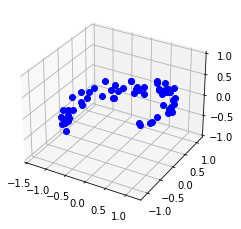

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2], "bo")
ax.set_xlim([-1.5, 1.3])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1, 1])
plt.show()

Podemos factorizar la matriz usando la funcionalidad que nos ofrece *Numpy*.

In [ ]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
Vt

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ],
       [-0.08626012, -0.31420255,  0.94542898]])

In [ ]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [ ]:
m, n = X.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

np.allclose(X_centered, U.dot(S).dot(Vt))

True

El siguiente gif explica de manera visual lo que ocurre al llevar a cabo la factorización.

![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Singular_value_decomposition.gif)

In [ ]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

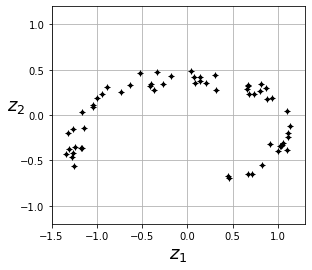

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

Hemos reducido nuestro dataset de 3 a 2 dimensiones, manteniendo la máxima información posible. En *Scikit-Learn* puedes usar el objeto [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) para llevar a cabo esta técnica.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

Podemos encontrar los componentes principales,

In [ ]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

saber la infromación retenida en cada uno de ellos,

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

cuánta información estamos perdiendo,

In [ ]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

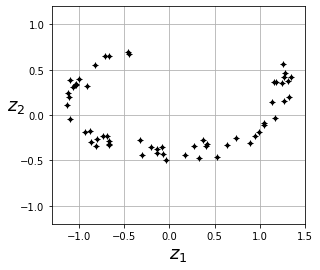

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.3, 1.5, -1.2, 1.2])
ax.grid(True)

Y recuperar los datos originales (teniendo en cuenta que la información perdida no la podremos recuperar).

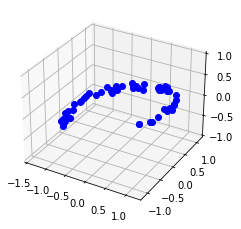

In [ ]:
X3D_inv = pca.inverse_transform(X2D)

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "bo")
ax.set_xlim([-1.5, 1.3])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1, 1])
plt.show()

In [ ]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1)) # mse

0.01017033779284855

A la hora de elegir el número de dimensiones a las que reducir un dataset es posible especificar la cantidad de información que estamos dispuestos a perder (un 5% suele ser lo habitual).

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

2

### Ejemplo MNIST

Vamos a aplicar PCA al dataset MNIST.

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [ ]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

El dataset original consiste de 70000 imágenes de 28x28 pixeles, lo cual implica unos 400 MB.

In [ ]:
mnist["data"].shape

(70000, 784)

In [ ]:
70000*8*784 / 1024 / 1024

418.701171875

Y podemos entrenar un clasificador de la siguiente manera

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
%time log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

CPU times: user 1min 13s, sys: 14.4 s, total: 1min 28s
Wall time: 22.5 s


/Users/rubencarthy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9204

Ahora vamos a aplicar PCA para reducir el dataset manteniendo el 95% de la información. Para ello usaremos 154 dimensiones (de las 784 originales), lo cual reduce el tamaño del dataset a 82 MB.

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [ ]:
70000*8*154 / 1024 / 1024

82.244873046875

Podríamos usar aún menos dimensiones, pero cada vez perderíamos más información.

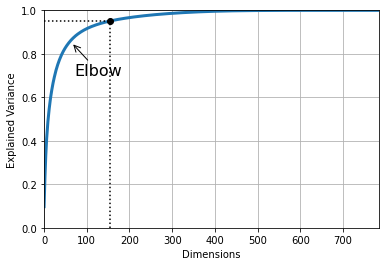

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 784, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

También es posible indicarle directamente al objeto PCA la cantidad de información que queremos retener.

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca.n_components_

154

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557435

Ahora podemos volver a entrenar el modelo, el cual entrena mucho más rápido manteniendo un nivel similar de precisión.

In [ ]:
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
log_clf2 = LogisticRegression()
%time log_clf2.fit(X_train_reduced, y_train)
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

CPU times: user 18.1 s, sys: 6.57 s, total: 24.6 s
Wall time: 7.31 s


/Users/rubencarthy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9147428571428572

Ahora podemos comparar las imágenes reales con la versión comprimida del dataset.

In [ ]:
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
import matplotlib as mpl 

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

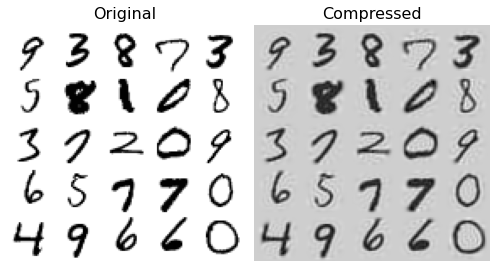

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train.values[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.tight_layout()

En el caso de que el dataset sea tan grande que no quepa en memoria, podemos aplicar la técnica de PCA en modo *batch* con el objeto [IncrementalPCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html?highlight=incrementalpca).

In [ ]:
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in tqdm(np.array_split(X_train, n_batches)):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

100%|██████████| 100/100 [01:00<00:00,  1.66it/s]


In [ ]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [ ]:
np.sum(inc_pca.explained_variance_ratio_)

0.9496663610365952

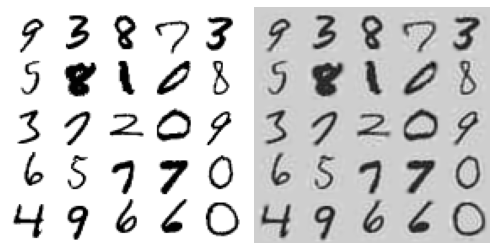

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train.values[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

## Otras técnicas

Otras técnicas menos comunes de reducción de la dimensionalidad son:

- LLE: *Locally Linear Embedding*
- *Random projections*
- *Multidimensional Scaling*
- *Isomap*
- *t-Distributed Stochastic Neighbor Embeddings* (t-SNE): usado para visualización.
- *Linear Discriminant Analysis* (LDA)

Puedes explorar en *Scikit-Learn* todas estas técnicas. Vamos a ver un ejemplo de uso de *t-SNE* para visualizar el dataset MNIST en dos dimensiones. Como este proceso puede ser muy lento, vamos a usar una muestra de solo 10000 imágenes.


In [ ]:
idx = np.random.permutation(len(X_train))[:10000]
X, y = X_train.values[idx], y_train.values[idx]

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
%time X_reduced = tsne.fit_transform(X)

/Users/rubencarthy/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rubencarthy/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 2min 3s, sys: 15.8 s, total: 2min 19s
Wall time: 23.5 s


Para la visualización podemos asignar un color a cada clase y ver cada muestra como un punto.

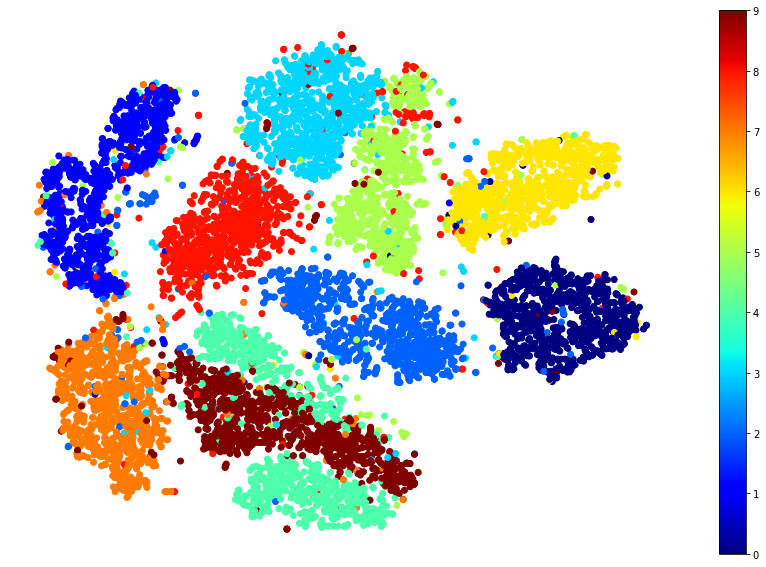

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=y.astype(np.uint8), cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

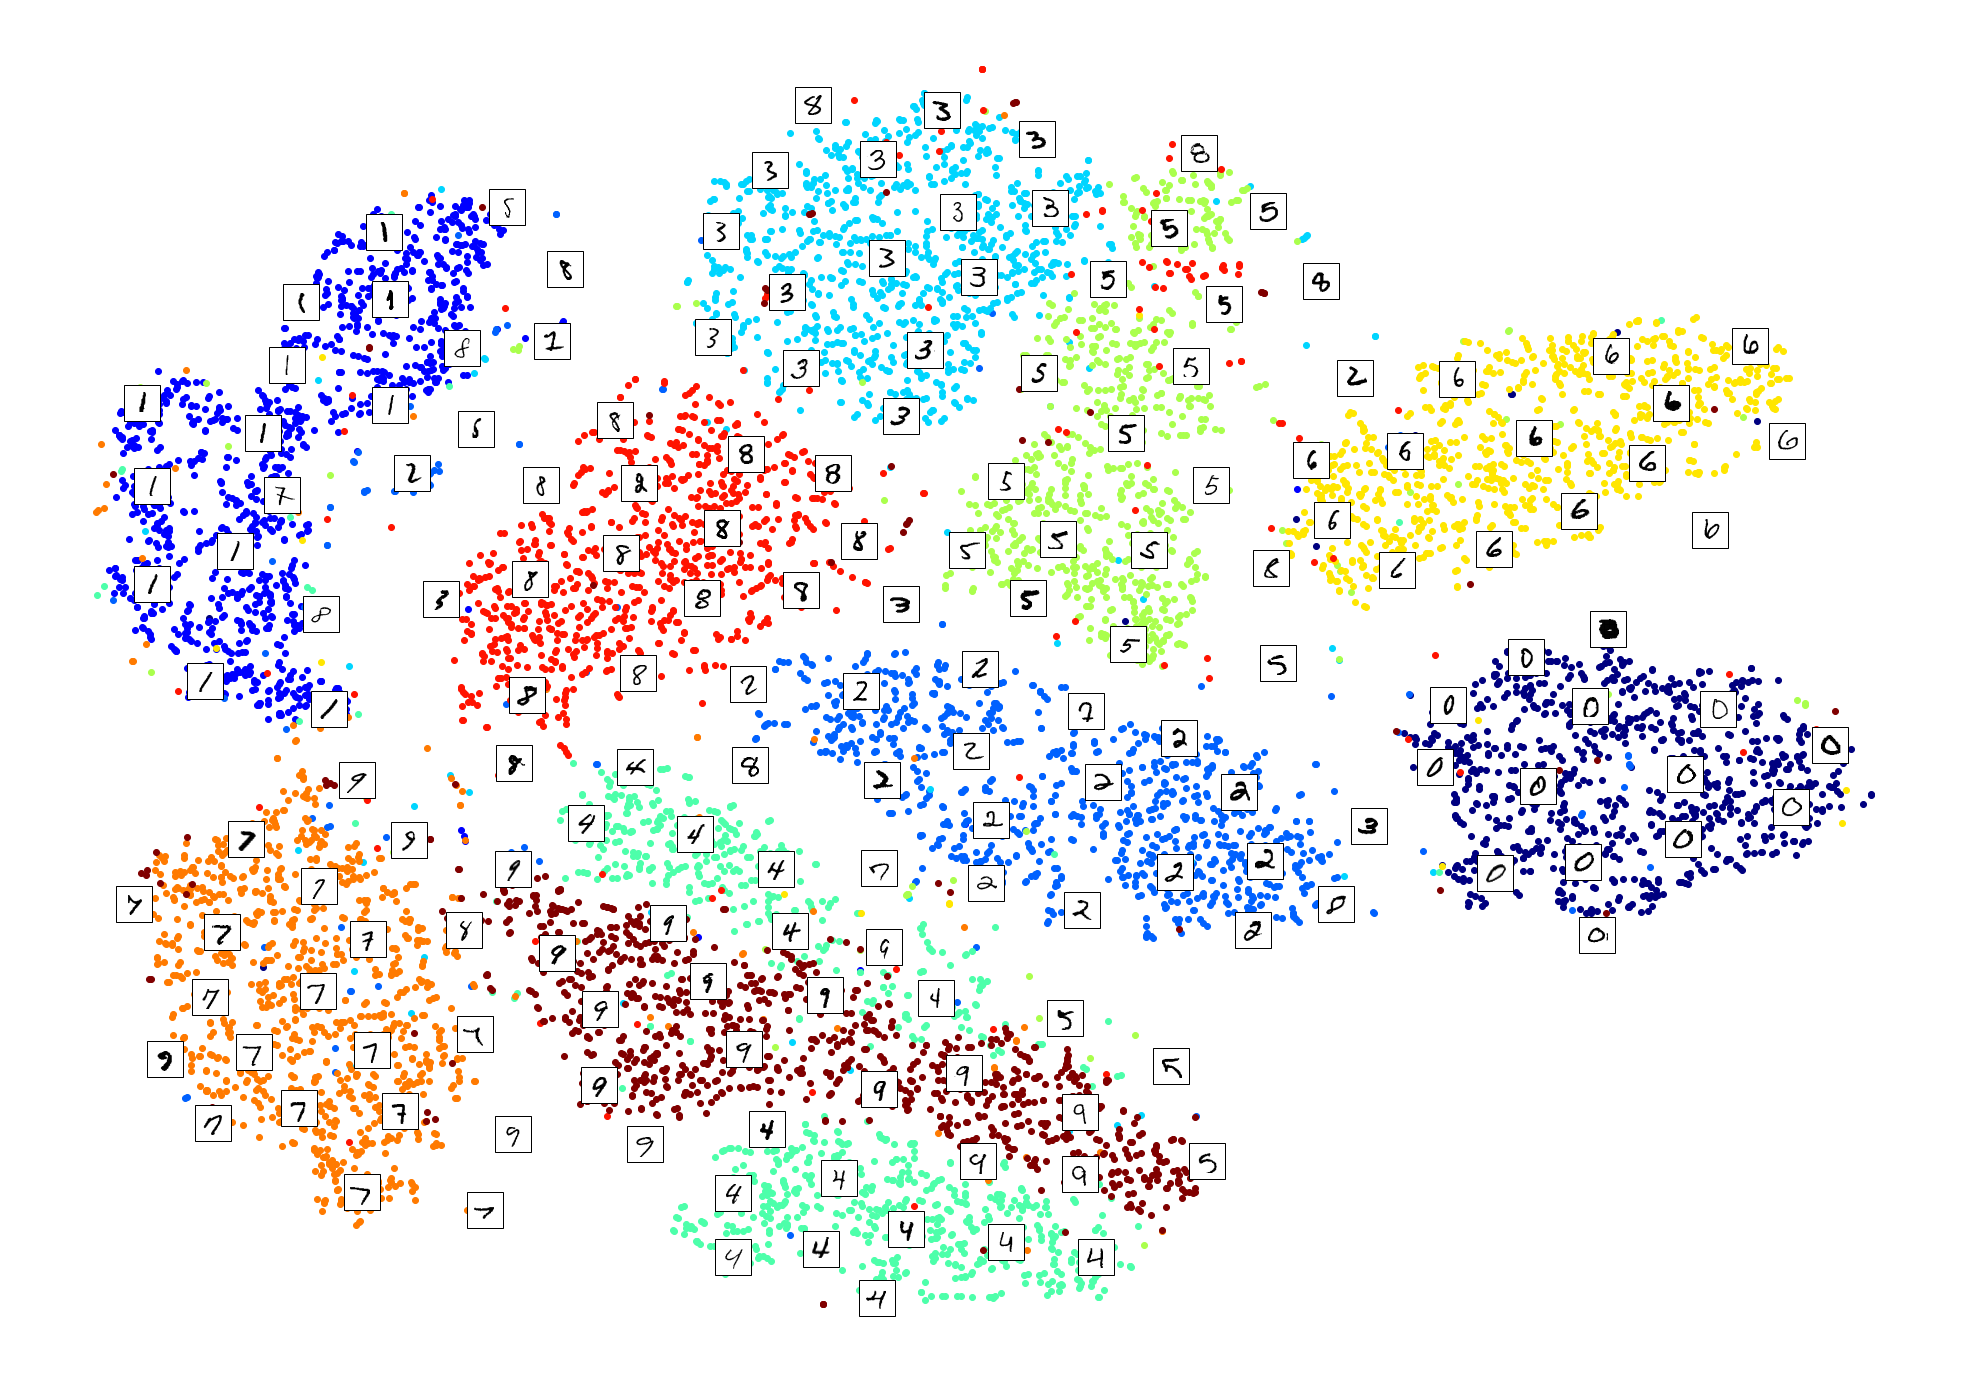

In [ ]:
plot_digits(X_reduced, y.astype(np.uint8), images=X, figsize=(35, 25))

Es común usar PCA en conjunto con t-SNE para acelerar el cálculo.

/Users/rubencarthy/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rubencarthy/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 2min 6s, sys: 20 s, total: 2min 26s
Wall time: 22.7 s


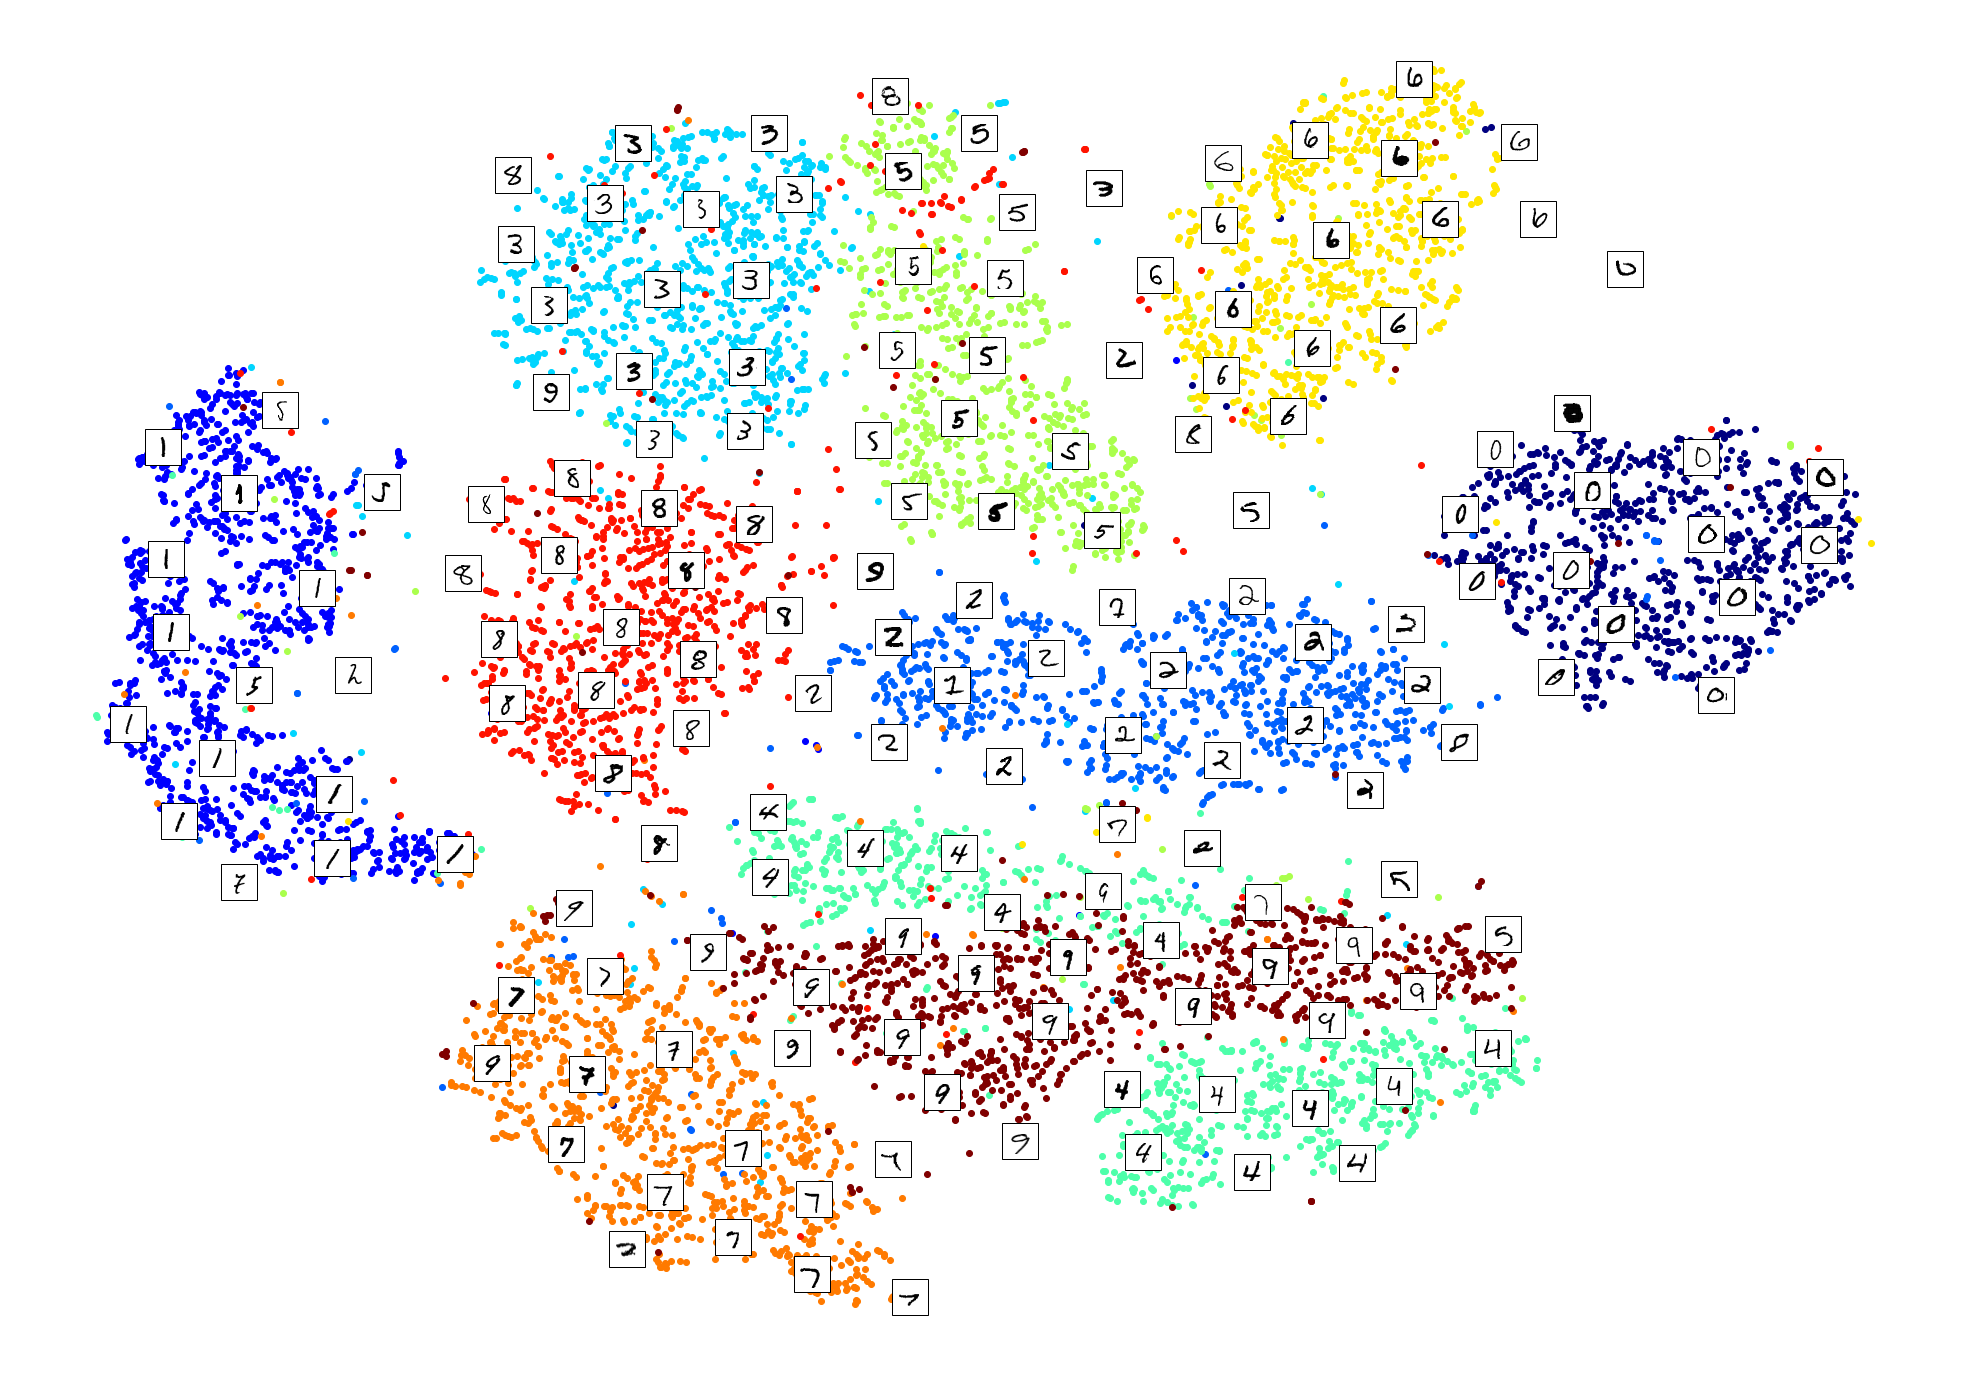

In [ ]:
from sklearn.pipeline import Pipeline

pca_tsne = Pipeline([
  ("pca", PCA(n_components=0.95, random_state=42)),
  ("tsne", TSNE(n_components=2, random_state=42))
])

%time X_reduced = pca_tsne.fit_transform(X)
plot_digits(X_reduced, y.astype(np.uint8), images=X, figsize=(35, 25))

## Resumen

En esta clase hemos aprendido sobre reducción de la dimensionalidad. Esta técnica consiste en reducir el número de *features* de un dataset con el objetivo de reducir su tamaño y poder así entrenar modelos de ML imposibles de entrenar con el dataset original o acelerar el proceso de entrenamiento. De entre los diferentes algoritmos existentes, hemos visto PCA (uno de los más usados) y t-SNE (una técnica muy útil para visualización de datos).